# PART 1: Electric Vehicle population in the state of Washington (WA)

<img src="img/WA_VE_POPULATION.png" />

## Descripción

This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

### Fuente

data.gov

## Objetivo

Sacar conclusiones interesantes sobre la población de vehiculos electricos en el estado de Washington mediante estadísticas y visualizaciones

## Importando librerias

In [1]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Cargando el dataset

In [2]:
link = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'

df = pd.read_csv(link, sep= ',', nrows=100_000)

df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


## Exploración inicial

Con el objetivo de hacer un primer vistazo y filtrado de datos

In [3]:
df.info() # se ven muy pocos valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         100000 non-null  object 
 1   County                                             99998 non-null   object 
 2   City                                               99998 non-null   object 
 3   State                                              100000 non-null  object 
 4   Postal Code                                        99998 non-null   float64
 5   Model Year                                         100000 non-null  int64  
 6   Make                                               100000 non-null  object 
 7   Model                                              99817 non-null   object 
 8   Electric Vehicle Type                              100000 non-null  object 

In [4]:
print(df['State'].unique())
print('\n')

print(df['County'].unique())
print(df['County'].nunique())
print('\n')

print(df['City'].unique()[-30:])
print(df['City'].nunique())
print('\n')

['WA' 'AP' 'BC' 'KY' 'NE' 'PA' 'AZ' 'IL' 'DC' 'MD' 'VA' 'NV' 'CA' 'OR'
 'TX' 'NC' 'WY' 'AL' 'GA' 'MO' 'NY']


['Yakima' 'Kitsap' 'King' 'Thurston' 'Snohomish' 'Chelan' 'Skagit'
 'Spokane' 'Whitman' 'Stevens' 'Douglas' 'Island' nan 'Walla Walla'
 'Clark' 'Klickitat' 'Cowlitz' 'Jefferson' 'Clallam' 'Pierce' 'Whatcom'
 'San Juan' 'Mason' 'Okanogan' 'Kittitas' 'Grant' 'Benton' 'Franklin'
 'Grays Harbor' 'Lewis' 'Oldham' 'Skamania' 'Pend Oreille' 'Asotin'
 'Pacific' 'Montgomery' 'Maricopa' 'Wahkiakum' 'Lake' 'Adams'
 'District of Columbia' 'Anne Arundel' 'Goochland' 'Lincoln' 'Orange'
 'Columbia' 'Kern' 'Marin' 'Polk' 'Ferry' 'Bexar' 'Hoke' 'Laramie'
 'Contra Costa' 'Lee' 'DeKalb' 'Platte' 'Cumberland' 'Garfield' 'Loudoun'
 'San Diego' 'Saratoga' 'Los Angeles' 'Santa Cruz' 'El Paso' 'Santa Clara'
 'Denton' 'Frederick' 'Wayne' 'Riverside' 'Fairfax' 'Multnomah'
 'Sacramento' 'Carroll' 'Wichita']
74


['Dallesport' 'Ravensdale' 'Cowiche' 'Glenwood' 'Davenport' 'Preston'
 'Edgewater' 'Lyle' 'Lo

In [5]:
print(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique())
print('\n')

print(df['Electric Vehicle Type'].unique())
print('\n')

print(df['Electric Utility'].unique()[-20:])
print(df['Electric Utility'].nunique())

['Clean Alternative Fuel Vehicle Eligible'
 'Not eligible due to low battery range'
 'Eligibility unknown as battery range has not been researched']


['Battery Electric Vehicle (BEV)' 'Plug-in Hybrid Electric Vehicle (PHEV)']


['OKANOGAN COUNTY ELEC COOP, INC'
 'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF KITTITAS COUNTY'
 'PUD NO 1 OF WHATCOM COUNTY'
 'BONNEVILLE POWER ADMINISTRATION||TOWN OF STEILACOOM|CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY'
 'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF WAHKIAKUM COUNTY'
 'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PUD NO 1 OF MASON COUNTY'
 'BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||BIG BEND ELECTRIC COOP, INC'
 'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||BENTON RURAL ELECTRIC ASSN|PENINSULA LIGHT COMPANY'
 'BONNEVILLE POWER ADMINISTRATION||BIG BEND ELECTRIC COOP, INC'
 'BONNEVILLE POWER ADMINISTRATION||TOWN OF EATONVILLE - (WA)|CITY OF TACOMA - (WA)'
 'BONNEVILLE POWER ADMINISTRATION||COLUMBIA RURAL ELEC AS

In [6]:
print(df['Base MSRP'].unique()) # no se lo que es
print('\n')

print(df['Electric Range'].unique()) # autonomia eléctrica en km
print('\n')

print(df['Vehicle Location'].nunique())
print(df['Postal Code'].nunique())

[     0  69900  32250  59900  31950  54950  52900  36800  81100  39995
  36900  98950  33950 110950  45600  44100  64950  53400  55700  34995
  43700  52650  90700 184400 102000  91250 109000 845000  75095  32995
  89100]


[238  47 220  75 210  19  23 208  84   0 308 322  20  26  38 266  35 107
  58  73 151  14 291 215  32 259  25  72 149 200  21  82 150  30  87 330
  18  53 239 100  93  16 270 293 249  29  37  33   6  40  17  22  68 125
 265  83 192 204 289   8 153  27  42  34  97 222  13 126 258  12  76  81
  10  41 234 233 111 103  15 114 245 110 337  28 203  62 124 218  48 170
  31  24   9  11  56  95  51  57  36  59  74]


539
545


In [7]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,99998.000000,100000.000000,100000.000000,100000.000000,99941.000000,1.000000e+05,9.999800e+04
mean,98202.893398,2019.569420,77.642780,1480.081600,30.764191,2.055639e+08,5.302110e+10
std,1154.436697,2.969628,99.808182,9857.045112,14.669756,8.807642e+07,8.125962e+08
min,12833.000000,1998.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98042.000000,2018.000000,0.000000,0.000000,20.000000,1.567694e+08,5.303301e+10
50%,98115.000000,2020.000000,25.000000,0.000000,35.000000,2.034921e+08,5.303303e+10
75%,98296.000000,2022.000000,151.000000,0.000000,43.000000,2.294392e+08,5.303509e+10
max,99403.000000,2023.000000,337.000000,845000.000000,49.000000,4.789346e+08,5.602100e+10


In [8]:
df.sample(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
14386,1FTVW1ELXN,King,Normandy Park,WA,98166.0,2022,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33.0,228200220,POINT (-122.34118 47.46665),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
27133,5YJ3E1EA0L,Snohomish,Bothell,WA,98012.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,44.0,124581523,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
54909,1N4AZ0CP0D,Jefferson,Port Hadlock,WA,98339.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,24.0,170383517,POINT (-122.75878 48.03591),BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...,5.303195e+10


## Limpieza y manipulacion de datos

### Selección de columnas

No todas las columnas son interesantes 

In [9]:
col_deseadas = ['County',
                'City',
                'Model Year',
                'Make', 
                'Model',
                'Electric Vehicle Type', 
                'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                'Electric Range',
                'DOL Vehicle ID',
                'Vehicle Location',
                'Electric Utility' ]

df = df[col_deseadas]
display(df.head())

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,DOL Vehicle ID,Vehicle Location,Electric Utility
0,Yakima,Yakima,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,141151601,POINT (-120.56916 46.58514),PACIFICORP
1,Kitsap,Poulsbo,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC
2,King,Seattle,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,King,Seattle,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
4,Thurston,Lacey,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC


### Hay duplicados ? 

In [10]:
df.duplicated().any() # no

False

### Hay outliers?

In [11]:
df.describe()

,Model Year,Electric Range,DOL Vehicle ID
count,100000.000000,100000.000000,1.000000e+05
mean,2019.569420,77.642780,2.055639e+08
std,2.969628,99.808182,8.807642e+07
min,1998.000000,0.000000,4.385000e+03
25%,2018.000000,0.000000,1.567694e+08
50%,2020.000000,25.000000,2.034921e+08
75%,2022.000000,151.000000,2.294392e+08
max,2023.000000,337.000000,4.789346e+08


Parece que hay vehiculos con autonomía 0

In [12]:
mask = df['Electric Range'] == 0

len(df[mask])

40868

Hay demasiados vehículos con autonomía 0, y eso no tiene sentido, por lo que voy a imponer el valor del más frecuente

In [13]:
df.loc[mask,'Electric Range'] = np.nan # antes de aplicar el imputer los valores 0 seran nan

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
most_common_imputer = SimpleImputer(strategy='median') # voy a imponer el de la mediana
df_numeric = df.select_dtypes(include=np.number)
most_common_imputer.fit(df_numeric)

SimpleImputer(strategy='median')

In [16]:
array_numeric = most_common_imputer.transform(df_numeric)

In [17]:
df_numeric = pd.DataFrame(array_numeric, columns = df_numeric.columns, index=df_numeric.index )
df_numeric.isna().any()

Model Year        False
Electric Range    False
DOL Vehicle ID    False
dtype: bool

In [18]:
df['Model Year'] = df_numeric['Model Year']
df['Electric Range'] = df_numeric['Electric Range']
df['DOL Vehicle ID'] = df_numeric['DOL Vehicle ID']

### Nans

In [19]:
df.isna().any().count() 

11

Solo hay 11 Nans, no es ni el 0,1% del dataset por  lo  que los voy a borrar

In [20]:
df.dropna(axis= 0, inplace= True)

In [21]:
df.info() # ya no hay ningun Nan

<class 'pandas.core.frame.DataFrame'>
Index: 99806 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   County                                             99806 non-null  object 
 1   City                                               99806 non-null  object 
 2   Model Year                                         99806 non-null  float64
 3   Make                                               99806 non-null  object 
 4   Model                                              99806 non-null  object 
 5   Electric Vehicle Type                              99806 non-null  object 
 6   Clean Alternative Fuel Vehicle (CAFV) Eligibility  99806 non-null  object 
 7   Electric Range                                     99806 non-null  float64
 8   DOL Vehicle ID                                     99806 non-null  float64
 9   Vehicle Loc

### arreglar datos estructurales: longitud y latitud

voy a separ la longitud y latitud en diferentes columnas y pasarlos a tipo númerico que es lo que son

In [22]:
df['Vehicle Location']= df['Vehicle Location'].str.replace('POINT (','')
df['Vehicle Location']= df['Vehicle Location'].str.replace(')','')


df['Vehicle Location']= df['Vehicle Location'].str.split(' ')
df['Vehicle Location'].head()
#df['Vehicle Location']

0    [-120.56916, 46.58514]
1    [-122.64681, 47.73689]
2    [-122.40092, 47.65908]
3     [-122.3684, 47.64586]
4    [-122.75379, 47.06316]
Name: Vehicle Location, dtype: object

In [23]:
def separar_cordenadas(fila): # para separar la latitud y la londitud 
    longitud = round(float(fila[0]), 4)
    latitud = round(float(fila[1]), 4)
    return pd.Series([longitud, latitud])

In [24]:
df[['longitud', 'latitud']] = df['Vehicle Location'].apply(lambda x: separar_cordenadas(x)) 

In [25]:
df.drop(axis=1, columns='Vehicle Location', inplace=True)

In [26]:
df.dtypes

County                                                object
City                                                  object
Model Year                                           float64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
DOL Vehicle ID                                       float64
Electric Utility                                      object
longitud                                             float64
latitud                                              float64
dtype: object

#### El año y el ID del vehiculo han pasado a tipo float

Probablemente cuando le hemos pasado el imputer

In [27]:
df['Model Year'] = df['Model Year'].astype('int64')
df['DOL Vehicle ID'] = df['DOL Vehicle ID'].astype(int)
df.dtypes

County                                                object
City                                                  object
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
DOL Vehicle ID                                         int32
Electric Utility                                      object
longitud                                             float64
latitud                                              float64
dtype: object

## EDA: Análisis exploratorio de los datos

In [28]:
df.sample(5)

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,DOL Vehicle ID,Electric Utility,longitud,latitud
39639,Thurston,Olympia,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,87.0,224453974,PUGET SOUND ENERGY INC,-122.9233,47.0378
4309,King,Sammamish,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,332347368,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),-122.0205,47.6033
872,Clark,Vancouver,2022,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,87.0,213550564,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,-122.7030,45.7095
1907,King,Redmond,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,87.0,220555247,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),-122.1316,47.6786
76692,Island,Camano Island,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,279910382,BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,-122.4005,48.2399


 ### ¿Cual es el primer coche eléctrico que se registro en en todo el dataset? ¿Cual es su marca, ciudad, modelo, y que autonomía tenía?

In [29]:
cond = df['Model Year'] == df['Model Year'].min()

primer_EV_en_WA = df.loc[cond,['Model Year', 'Make', 'Model', 'City', 'Electric Range']]
primer_EV_en_WA

,Model Year,Make,Model,City,Electric Range
28188,1998,FORD,RANGER,Sequim,58.0


In [30]:
primer_EV_en_WA['Model Year']

28188    1998
Name: Model Year, dtype: int64

#### Conclusiones

El primer coche eléctrico en WA era un ford modelo Ranger en la ciudad de Sequim con una autonomía de 58 km, en el año 1998

### ¿En que año se trajo el primer Tesla a WA?

In [31]:
cond = df['Make'] == 'TESLA'

df_tesla = df.loc[cond, ['Model Year', 'Make', 'Model', 'City', 'Electric Range']]

cond_ = df_tesla['Model Year'] == df_tesla['Model Year'].min()
df_tesla[cond_]

,Model Year,Make,Model,City,Electric Range
893,2008,TESLA,ROADSTER,Kirkland,220.0
1526,2008,TESLA,ROADSTER,Port Orchard,220.0
13358,2008,TESLA,ROADSTER,Seattle,220.0
15253,2008,TESLA,ROADSTER,Burien,220.0
19737,2008,TESLA,ROADSTER,Seattle,220.0
25572,2008,TESLA,ROADSTER,Seattle,220.0
40023,2008,TESLA,ROADSTER,Redmond,220.0
48134,2008,TESLA,ROADSTER,Issaquah,220.0
51135,2008,TESLA,ROADSTER,Seattle,220.0
51167,2008,TESLA,ROADSTER,Seattle,220.0


#### Conclusiones

El primer modélo de tesla fue un Roadster, aparecieron varios en diferentes ciudades, y gozaban de una autonomía de nada más y nada menos que de 220 km.

### ¿ Cuales son los 10 modelos más populares ?

In [32]:
df['Model'].value_counts().head(10)

Model
MODEL 3        19627
MODEL Y        17073
LEAF           10164
MODEL S         5689
BOLT EV         4085
MODEL X         3761
VOLT            3397
NIRO            1951
PRIUS PRIME     1860
ID.4            1802
Name: count, dtype: int64

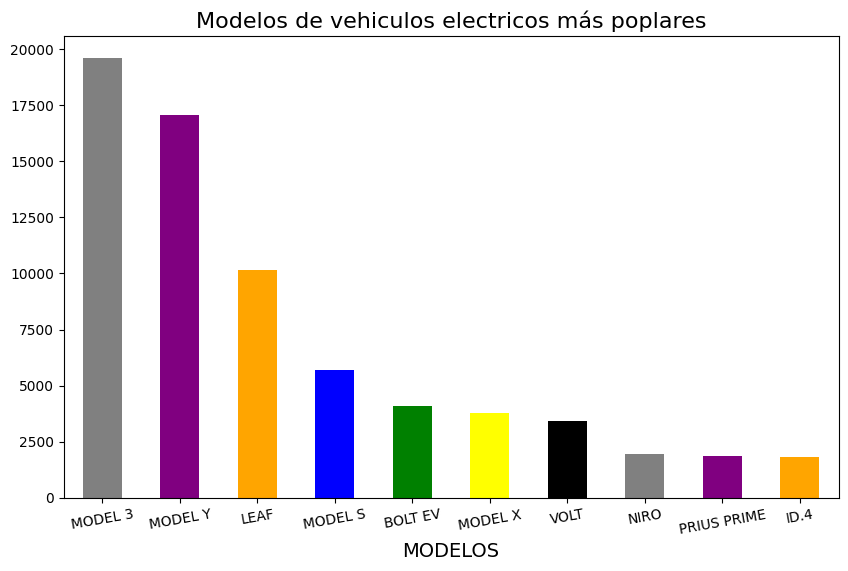

In [33]:
df['Model'].value_counts().head(10).plot(kind= 'bar',
                                         figsize= (10,6),
                                         color = ['grey', 'purple','orange', 'blue','green', 'yellow', 'black'],
                                         rot = 10,
                                         )

plt.title('Modelos de vehiculos electricos más poplares', fontdict={'fontsize':16})
plt.xlabel('MODELOS', fontdict={'fontsize':14})

plt.show()

In [34]:
cond1 = df['Model'] == 'MODEL 3'
cond2 = df['Model'] == 'MODEL Y'
cond3 = df['Model'] == 'LEAF'


df.loc[cond1 | cond2 | cond3, 'Make'].unique()

array(['TESLA', 'NISSAN'], dtype=object)

#### Conclusiones

Los tres modelos más populares de coches eléctricos son MODEL3, MODEL Y, y LEAF perteneciendo los primeros dos a  la marca Tesla, y el último a Nissan.

### ¿ Ha mejorado la autonomía de los coches con el paso de los años? ¿Hay alguna marca de vehículos que destaque sobre las demás en cuanto a autonomía se refiere?

**Disclaimer**: El dato de autonomía de vehículo no era de buena calidad, y ha sido manipulado para tener unos datos más realistas, por lo que las conclusiones de este análisis no se deben tomar como verídicos.

In [35]:
Er_per_year = df.groupby(['Model Year'])['Electric Range'].mean()
Er_per_year

Model Year
1998     58.000000
1999     74.000000
2000     58.000000
2002     95.000000
2008    220.000000
2010    227.941176
2011     70.886513
2012     62.969943
2013     81.996155
2014     81.983514
2015     98.244059
2016    102.512368
2017    113.187289
2018    157.834014
2019    177.428836
2020    241.289787
2021     78.434835
2022     78.601610
2023     76.428468
Name: Electric Range, dtype: float64

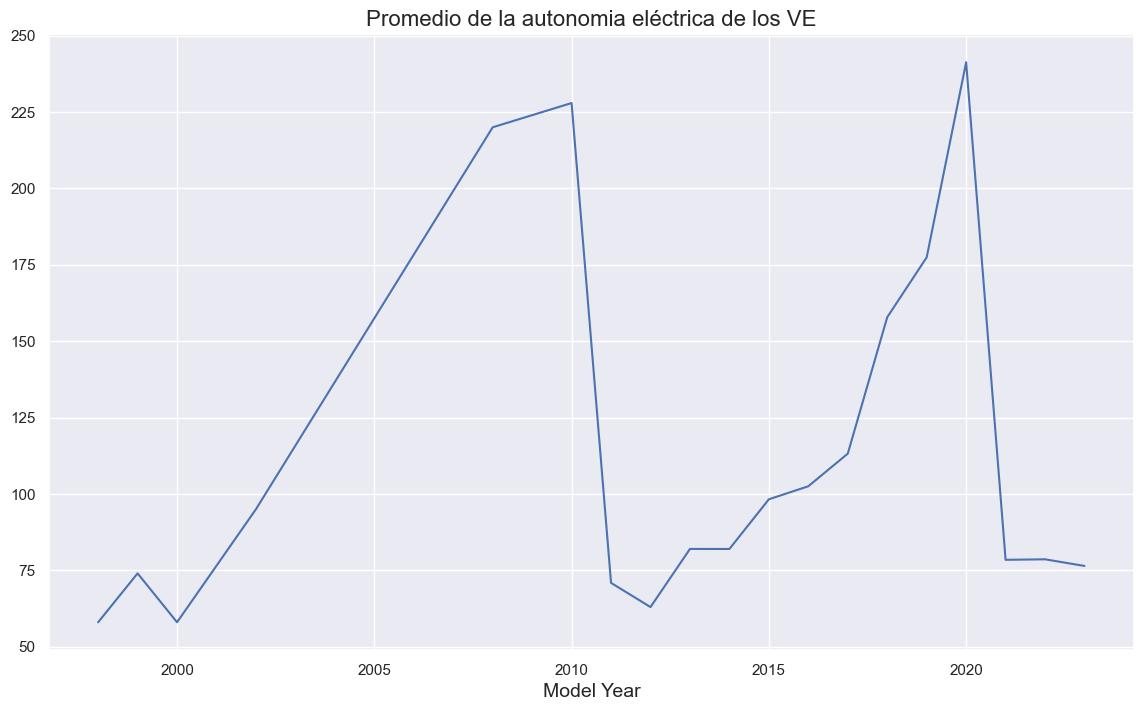

In [65]:
plt.figure(figsize=(14,8))

g = sns.lineplot(data= Er_per_year,
             x = Er_per_year.index,
             y = Er_per_year.values,
)
#sns.set(rc = {'figure.figsize':(15, 8)})
plt.title('Promedio de la autonomia eléctrica de los VE', fontdict={'fontsize':16})
plt.xlabel('Model Year', fontdict={'fontsize':14})
plt.show()

In [37]:
df['Make'].nunique()

35

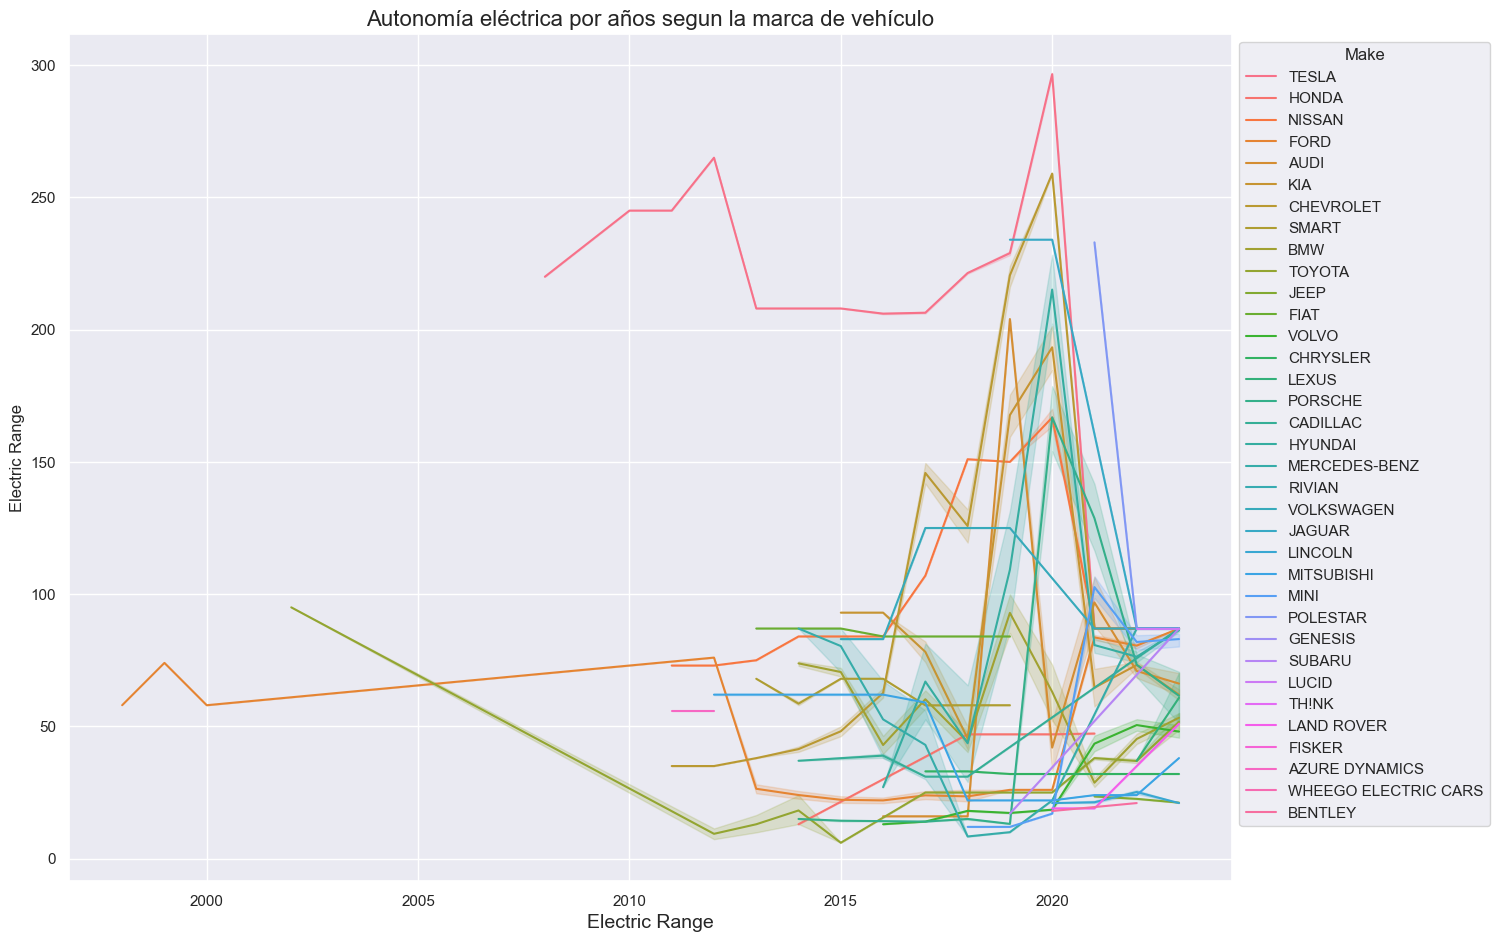

In [63]:
plt.figure(figsize=(15,11))

g = sns.lineplot(data= df,
             x= 'Model Year',
             y = 'Electric Range',
             hue= 'Make',
             )

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#sns.set(rc = {'figure.figsize':(12, 9)})

plt.title('Autonomía eléctrica por años segun la marca de vehículo', fontdict={'fontsize':16})
plt.xlabel('Model Year', fontdict={'fontsize':14})
plt.xlabel('Electric Range', fontdict={'fontsize':14})

plt.show()

#### conclusiones

Segun el primer gráfico, la autonomía de los coches no parece seguir una tendencia claramente alcista (ni bajista, más bien, parece un rango cíclico) conforme pasan los años.

El objetivo del segundo gráfico, que de hecho, no es una buena visualización, es ver si una marca destaca sobre las demás en cuanto a autonomía se refiere... Tesla destaca bastante al principio, pero tampoco se puede apreciar ninguna tendencia clara, ni en Tesla ni en las demas marcas.

### ¿Como se distribuyen los vehículos eléctricos en la ciudad de washinton geograficamente?

In [39]:
df.head()

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,DOL Vehicle ID,Electric Utility,longitud,latitud
0,Yakima,Yakima,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,141151601,PACIFICORP,-120.5692,46.5851
1,Kitsap,Poulsbo,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47.0,171566447,PUGET SOUND ENERGY INC,-122.6468,47.7369
2,King,Seattle,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,9426525,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),-122.4009,47.6591
3,King,Seattle,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,211807760,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),-122.3684,47.6459
4,Thurston,Lacey,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,185810306,PUGET SOUND ENERGY INC,-122.7538,47.0632


In [40]:
import matplotlib.colors as colors

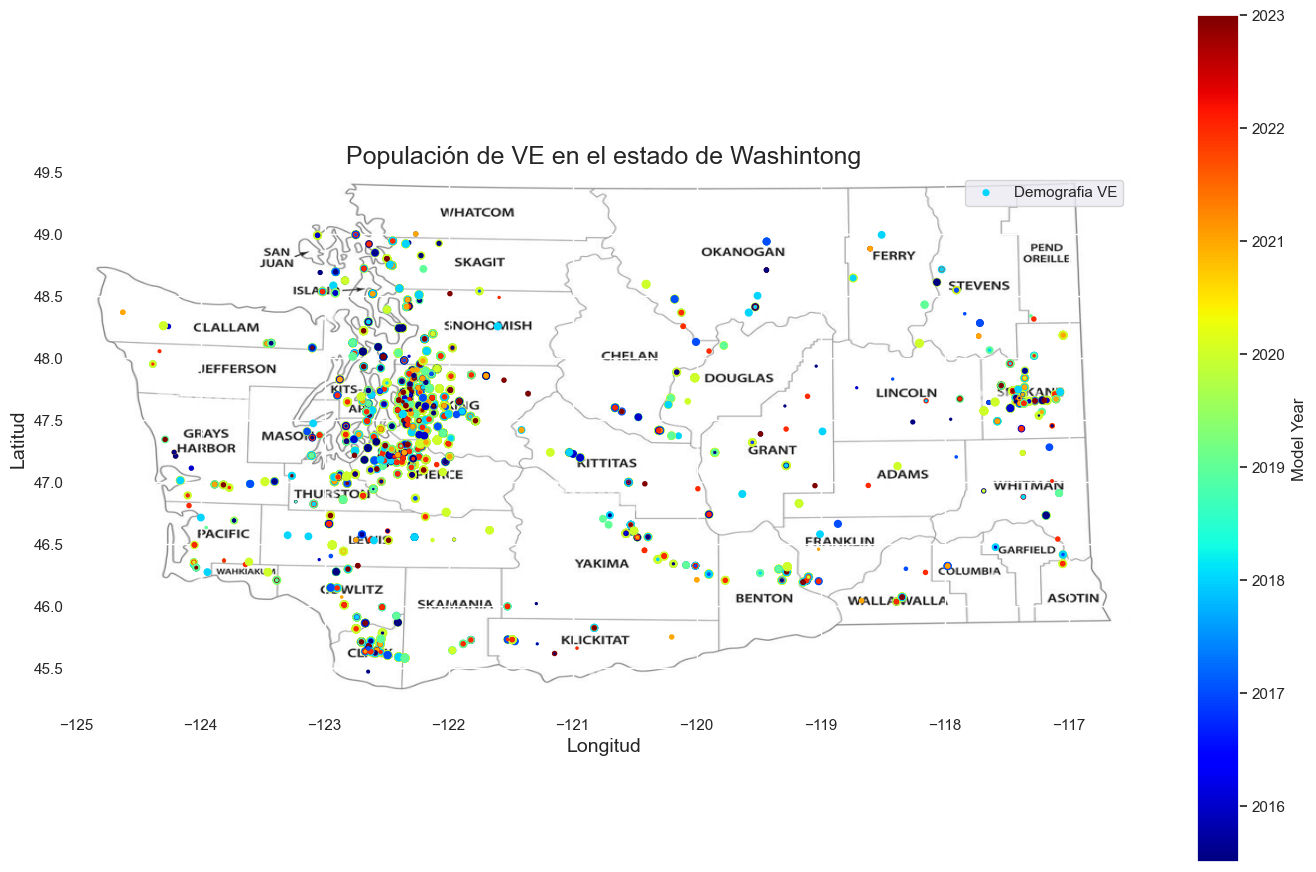

In [41]:
# esto es para centrar la barra de colores donde yo quiero
vmin = df['Model Year'].max() - (df['Model Year'].max() - df['Model Year'].min()) * 0.3
vmax = df['Model Year'].max()

norm = colors.Normalize(vmin=vmin, vmax=vmax)

# esto es scatter plot
scatter = df.plot(kind="scatter", x="longitud", y="latitud", grid=True,
                  s=df["Electric Range"]/10, label="Demografia VE",
                  c="Model Year", cmap="jet", colorbar=True,
                  legend=True, sharex=False, figsize=(17,11), norm= norm)

# ajustando la escala para que cuadre el mapa con con el scatter
axis = -125, -116.5, 45.2, 49.5
plt.axis(axis)

#  Títulos y etiquetas
plt.title('Populación de VE en el estado de Washintong', fontdict={'fontsize':18})
plt.ylabel('Latitud', fontdict={'fontsize':14})
plt.xlabel('Longitud', fontdict={'fontsize':14})

# cargamos la imagen debajo del scatter
ruta_img = os.path.join('img','WA_state_2.png')
california_img = plt.imread(ruta_img)
plt.imshow(california_img, extent=axis)
# plt.savefig("Densidad_poblacional_VE_WA")

plt.show()

#### Conclusiones

Es un gráfico aproximado del Mapa de washintong debajo del scatter plot de longitud - latitud, el gráfico no esta 100% clavado, pero da una buena idea de la densidad poblacional de VE.

Como es lógico, la mayor densidad poblacional de VE esta concentrada en en las grandes ciudades como Olimpya y Seattle. La mayor parte de los vehiculos nuevos ( color rojo ) estan también concentrado en estas zonas, siendo las zonas menos pobladas, son más dominantes de vehículos viejos ( color azul ).

El tamaño de los puntos esta escalado a su autonomía; no parece que haya una zona donde destaque, ni en puntos pequeños ni en grandes.

**Nota**: Me han salido canas haciendo esto.

### ¿Muestran las marcas/modelo de VE alguna tendencia hacia algun tipo de vehículo?

In [42]:
df.sample(5)

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,DOL Vehicle ID,Electric Utility,longitud,latitud
36609,Clark,Amboy,2023,AUDI,E-TRON,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,87.0,231187204,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,-122.4215,45.9196
23507,King,Normandy Park,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,87.0,229573830,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),-122.3412,47.4667
37001,King,Maple Valley,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,476595584,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),-122.0453,47.3939
7900,Island,Oak Harbor,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,87.0,181200813,PUGET SOUND ENERGY INC,-122.6468,48.2908
58994,Snohomish,Lynnwood,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,87.0,207891988,PUGET SOUND ENERGY INC,-122.2773,47.8379


In [43]:
print(df['Make'].nunique())
print(df['Model'].nunique())

35
120


In [44]:
pd.pivot_table(data= df,
               index='Model Year',
               columns='Electric Vehicle Type',
               values= 'Make',
               aggfunc= lambda x: x.value_counts().count(),
               fill_value=0)

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
Model Year,,
1998,1,0
1999,1,0
2000,1,0
2002,1,0
2008,1,0
2010,1,1
2011,4,1
2012,6,3
2013,6,3


In [45]:
pd.pivot_table(data= df,
               index='Model Year',
               columns='Electric Vehicle Type',
               values= 'Model',
               aggfunc= lambda x: x.value_counts().count(),
               fill_value=0)

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
Model Year,,
1998,1,0
1999,1,0
2000,1,0
2002,1,0
2008,1,0
2010,1,1
2011,4,1
2012,6,3
2013,6,4


In [46]:
modelos_y_tipos_de_VE_por_ano = pd.pivot_table(data= df,
                                             index='Model Year',
                                             columns='Electric Vehicle Type',
                                             values= 'Model',
                                             aggfunc= lambda x: x.value_counts().count(),
                                             fill_value=0)

marcas_y_tipos_de_VE_por_ano = pd.pivot_table(data= df,
                                               index='Model Year',
                                               columns='Electric Vehicle Type',
                                               values= 'Make',
                                               aggfunc= lambda x: x.value_counts().count(),
                                               fill_value=0)


<Figure size 200x700 with 0 Axes>

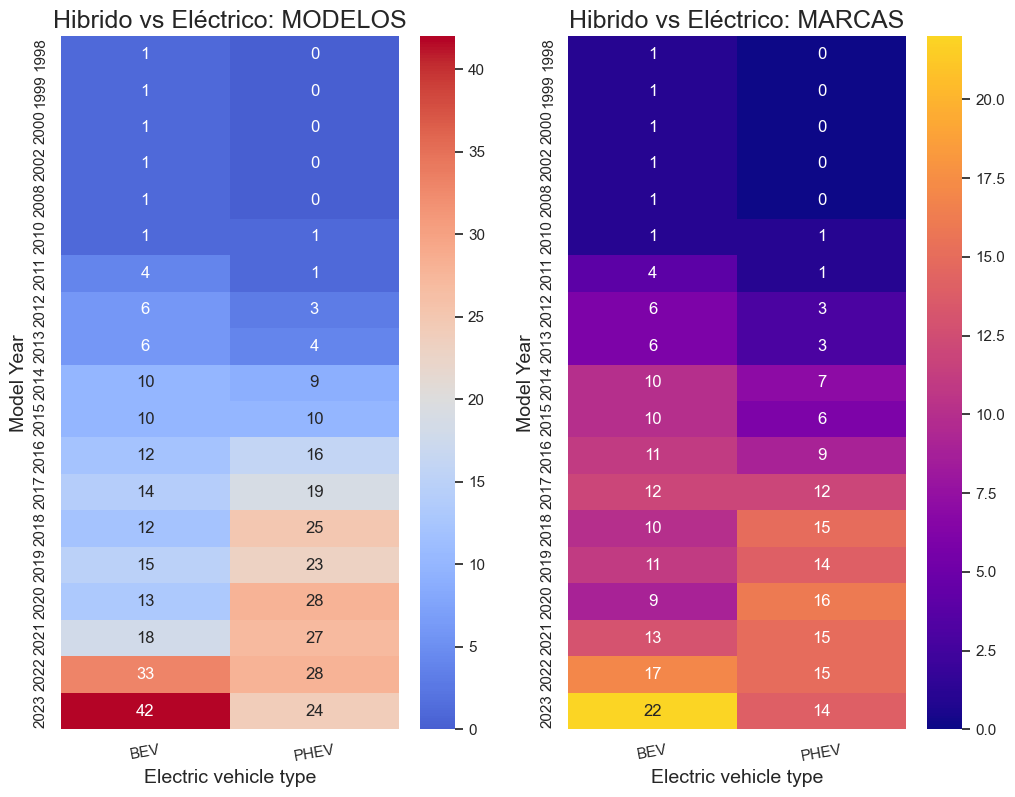

In [47]:
plt.figure(figsize=(2, 7))
fig, g = plt.subplots(1,2, sharex= True)

g[0] = sns.heatmap(data=modelos_y_tipos_de_VE_por_ano,
                   ax= g[0],
                   cmap= 'coolwarm',
                   annot= True,
                   center= 20,
                   
            )

#  Títulos y etiquetas
g[0].set_title('Hibrido vs Eléctrico: MODELOS', fontsize = 18)
g[0].set_xlabel('Electric vehicle type',fontsize = 14)
g[0].set_ylabel('Model Year',fontsize = 14)
g[0].set_xticklabels(labels= ['BEV', 'PHEV'],rotation= 10)

g[1] = sns.heatmap(data=marcas_y_tipos_de_VE_por_ano,
                   ax= g[1],
                   cmap= 'plasma',
                   annot= True,
                   center= 12,
            )

#  Títulos y etiquetas
g[1].set_title('Hibrido vs Eléctrico: MARCAS', fontsize = 18)
g[1].set_xlabel('Electric vehicle type',fontsize = 14)
g[1].set_ylabel('Model Year',fontsize = 14)
g[1].set_xticklabels(labels= ['BEV', 'PHEV'],rotation= 10)

plt.show();

#### Conclusiones

Cabe destacar que no hay datos sobre todos los años, desde 1998 hasta 2023.

Se puede observar que tanto la cantidad de marcas de vehículos, como la cantidad de modelos ha aumentado en los últimos años. Sin embargo, hay una diferencia; la cantidad de marcas y modelos puramente eléctricos (BEV) que estan apareciendo presentan mayor crecimiento (más acelerado) en los últimos años que los vehículos híbridos (PHEV), que presentan un crecimiento más progresivo. Además, cabe mencionar que la cantidad de VE supero a los vehículos híbridos en año 2022.

Por lo tanto, las empresas estan interesadas en crear más vehículos eléctricos que híbridos.

**Nota**: a veces me pone los años en vertical y otras en horizontal, el argumento set_yticklabels no me funciona, aunque tampoco me da error

# PART 2: Energy consumtion on steel industry

## Descripción

Data Set Information:

The information gathered is from the DAEWOO Steel Co. Ltd in Gwangyang, South Korea. It produces several types of coils, steel plates, and iron plates. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.

### Attribute Information:

- Data Variables Type Measurement
- Industry Energy Consumption Continuous kWh
- Lagging Current reactive power Continuous kVarh
- Leading Current reactive power Continuous kVarh
- tCO2(CO2) Continuous ppm
- Lagging Current power factor Continuous %
- Leading Current Power factor Continuous %
- Number of Seconds from midnight Continuous S
- Week status Categorical (Weekend (0) or a Weekday(1))
- Day of week Categorical Sunday, Monday â€¦. Saturday
- Load Type Categorical Light Load, Medium Load, Maximum Load 



### Fuente

openML

## Objetivo
  
Visualizar y analizar algunas variables númericas del dataset, las cuales carecía el dataset anterior. En esta parte no me extenderé tanto como en la parte anterior.


## Cargando el dataset

In [48]:
path = os.path.join('data', 'Steel_industry_data.csv')

df_si = pd.read_csv(path, sep= ',', index_col=[0])

df_si.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
date,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


## Exploración inicial

In [49]:
df_si.info() # no tiene nulos

<class 'pandas.core.frame.DataFrame'>
Index: 35040 entries, 01/01/2018 00:15 to 31/12/2018 00:00
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
 9   Load_Type                             35040 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.9+ MB


- El dataset no tiene Nulos
- De 10 columnas 3 son variables categóricas tipo object, y las 7 restantes son variables númericas
- Parece que el dataset ya viene bastante limpio

## Limpieza y manipulación de datos

### Tiene datos duplicados?

In [50]:
df_si.duplicated().value_counts()

False    34959
True        81
Name: count, dtype: int64

In [51]:
df_si.drop_duplicates(keep='first', inplace= True)

### Hay outliers ?

In [52]:
df_si.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,34959.000000,34959.000000,34959.000000,34959.000000,34959.000000,34959.000000,34959.000000
mean,27.443111,13.056014,3.875959,0.011551,80.625036,84.350093,42781.343860
std,33.462669,16.319073,7.427964,0.016160,18.902835,30.467553,24923.195433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.420000,99.690000,21600.000000
50%,4.570000,5.000000,0.000000,0.000000,88.000000,100.000000,43200.000000
75%,51.300000,22.720000,2.090000,0.020000,99.040000,100.000000,64800.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


En este dataset tambien tenemos datos cuando no hay consumo energético

In [53]:
mask = df_si['Usage_kWh'] == 0

df_si[mask] # solo hay un historico de cuando el consumo es 0, no supone un problema.

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
date,,,,,,,,,,
07/11/2018 00:00,0.0,0.0,0.0,0.0,0.0,0.0,0,Weekday,Wednesday,Light_Load


## Visualizando variables númericas

### Que tipo de distribución presentan las variables númericas?

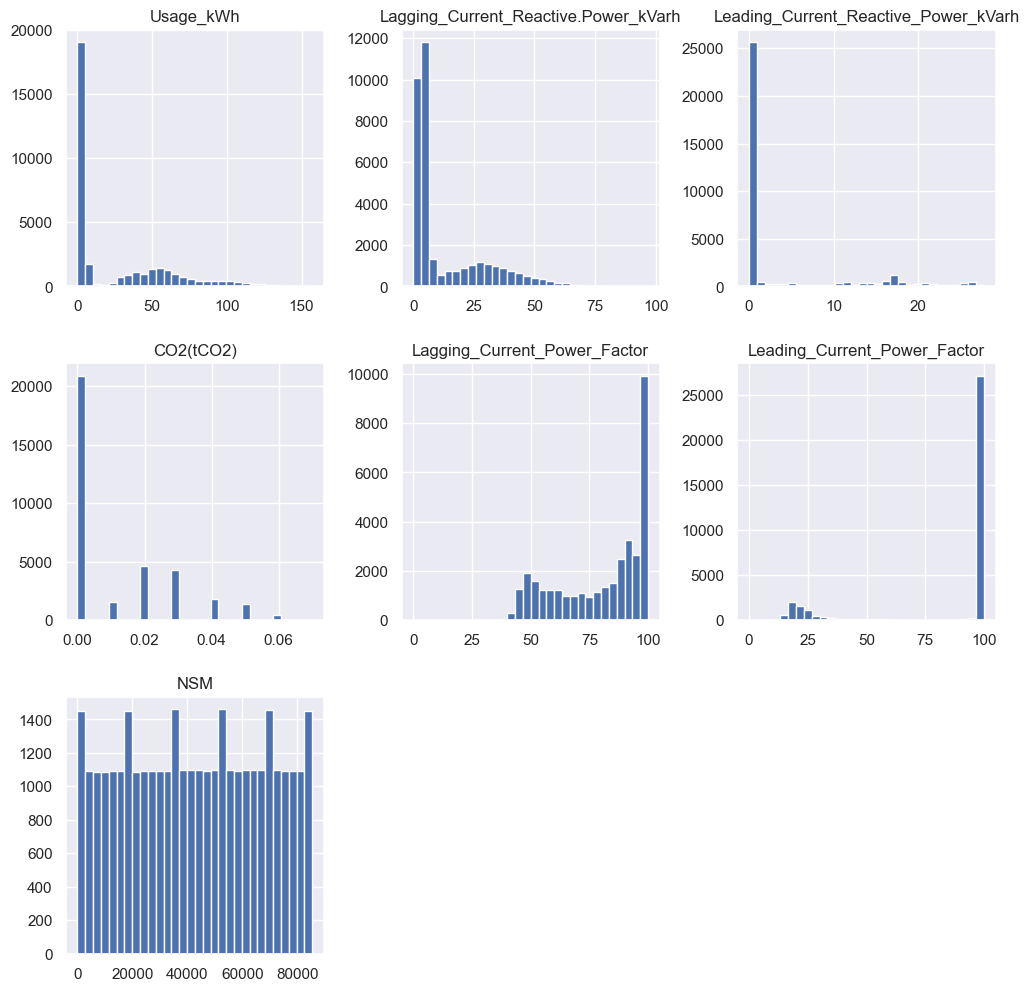

In [54]:
df_si.hist(figsize = (12,12), grid = True, bins= 30)
plt.show()

parece que la mayor parte del cosumo electrico se concentra en valores muy pequeños, y no nos permite observar las distribuciones adecuadamente

In [55]:
mask = df_si['Usage_kWh'] <20

len(df_si[mask])

21141

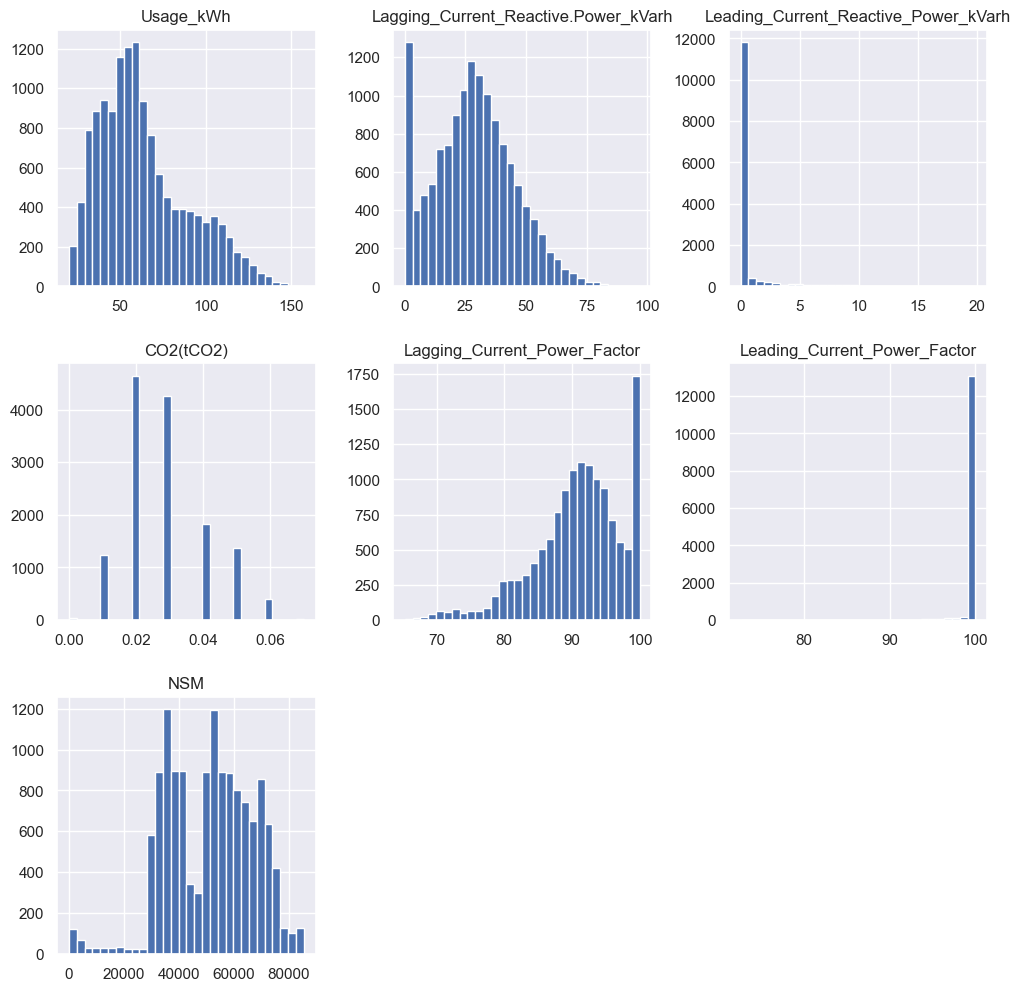

In [56]:
mask = df_si['Usage_kWh'] >20 # quiero ver el mismo histplot pero sin tanto sesgo hacia valores pequeños


df_si[mask].hist(figsize= (12,12), grid= True, bins= 30)
plt.show()

Ahora se puede observar mejor la distribución de las variables; estas siguen una distribución normal, altamante sesgadas a la baja o a la alza, teneiendo en cuenta que hemos eliminado los valores de bajo consumo energético.

En caso de continuar con un proyecto de machine learning crearía una pipeline para aplicar una transformación logarítmica a los datos para poder escalarlos despues y que su distribución se parezca más a la normal, pero como no es el caso continuaré así.

### Existen correlaciones entre variables?


#### Pairplot

In [57]:
df_si.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
date,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [58]:
df_si_filtrado = df_si[mask]

In [59]:
cols = ['Usage_kWh','Lagging_Current_Reactive.Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'NSM']

<Figure size 1200x1200 with 0 Axes>

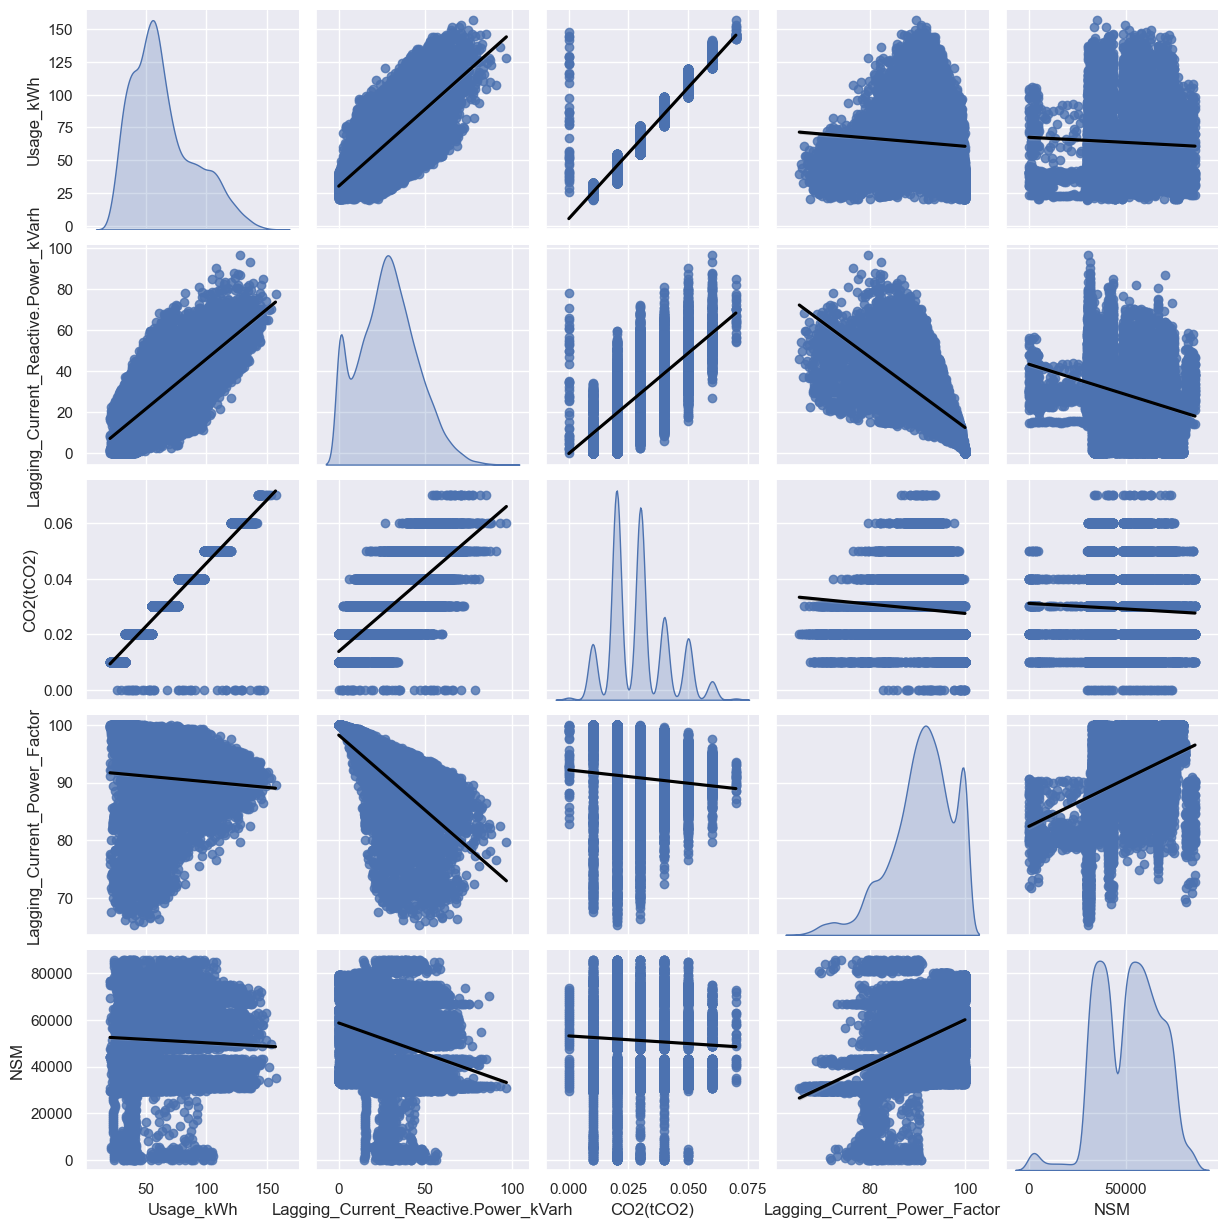

In [60]:
plt.figure(figsize= (12,12))

g = sns.pairplot(df_si_filtrado[cols],
                 diag_kind='kde',
                 kind= 'reg',
                 plot_kws= {'line_kws': {'color':'black'}})

plt.show()

#### Correlation matrix

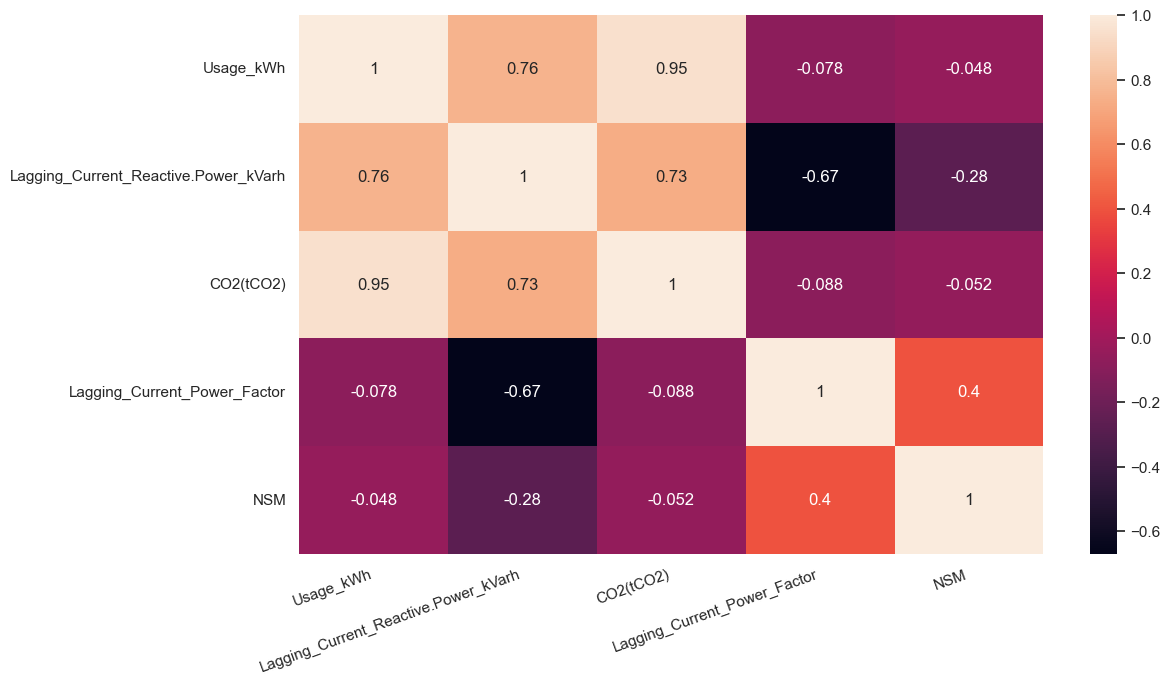

In [61]:
corr_matrix = df_si_filtrado[cols].corr()

plt.figure(figsize= (12,7))

g = sns.heatmap(corr_matrix,
                annot=True)

g.set_xticklabels(labels= cols,rotation= 20, ha= 'right')

plt.show()

#### Conclusiones

- Existe una alta correlacion positiva entre 'Usage_kWh' y 'CO2(tCO2)' hay una alta correlación positiva, se podría decir que cuando sube el consumo energético sube la produccion de CO2.

- Existe correlación media positiva también entre 'Usage_kWh','Lagging_Current_Reactive.Power_kVarh' y 'Lagging_Current_Power_Factor', 'CO2(tCO2)'.

- Es destacable la ausencia de correlaciones entre las variables antes mencionadas y el 'NMS' (Number of Seconds from midnight Continuous S).

- La única correlación negativa significativa esta entre las variables 'Lagging_Current_Reactive.Power_kVarh' y 'Lagging_Current_Power_Factor'.

Hay que tener en cuenta que estamos utilizando un dataset filtrado y no todo el dataset, por lo que estos resultados pueden verse modificados si analizamos todo el dataset.

#### Nota final: 

El dataset es interesante y esta bastante preparado para implementar un algoritmo de regresión lineal teniendo como variable objetivo el gasto energético, sin embargo, para no extenderme demasiado no voy a continuar, pues el objetivo era sacar visualizaciones y conclusiones de estas.